In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import tensorflow

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
'''
import tensorflow as tf
pre_model= tf.keras.applications.VGG16(include_top=False,
                             weights='imagenet',
                             input_shape=(150,150,3))
                             
                             '''

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:

train_datagen = ImageDataGenerator(rescale = 1./255,rotation_range=15,
                                    width_shift_range=0.15,
                                    height_shift_range=0.15,
                                    shear_range=0.15,
                                    zoom_range=0.15,
                                    horizontal_flip=True,
                                  )
val_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
#Batch Size and Image Size
batch_sz = 64
sz = 48

train_generator = train_datagen.flow_from_directory('../input/fer-dsc-v3/final_data_v5/final_data_v5/Train',
                                                    batch_size = batch_sz,
                                                    class_mode='categorical',
                                                    target_size=(sz,sz))

val_generator = val_datagen.flow_from_directory('../input/fer-dsc-v3/final_data_v5/final_data_v5/Test',
                                                    batch_size = batch_sz,
                                                    class_mode='categorical',
                                                    target_size=(sz,sz))

Found 13651 images belonging to 4 classes.
Found 1649 images belonging to 4 classes.


In [6]:
from keras.applications.resnet50 import ResNet50

pre_model = ResNet50(include_top = False,
                 weights = 'imagenet',
                 input_shape = (48,48,3))

for layer in pre_model.layers:
    layer.trainable=False

last_output = pre_model.output

94773248/94765736 [==============================] - 1s 0us/step


In [7]:
pre_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 54, 54, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 24, 24, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 24, 24, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [8]:
for layer in pre_model.layers:
    layer.trainable=False

last_output = pre_model.get_layer('conv2_block3_2_conv').output

In [9]:
x = tf.keras.layers.GlobalAveragePooling2D()(last_output)
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(256,activation='relu')(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(128,activation= 'relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(4,activation='softmax')(x)

model = tf.keras.Model(pre_model.input, x)

In [10]:
opt = tf.keras.optimizers.RMSprop(learning_rate=1e-5)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_generator,
                   validation_data=val_generator,
                    steps_per_epoch=train_generator.samples//train_generator.batch_size,
                   validation_steps=val_generator.samples//val_generator.batch_size,
                    epochs=30
                    )

Epoch 1/30
213/213 [==============================] - 42s 199ms/step - loss: 1.4033 - accuracy: 0.2562 - val_loss: 1.3814 - val_accuracy: 0.2675
Epoch 2/30
213/213 [==============================] - 23s 108ms/step - loss: 1.3893 - accuracy: 0.2592 - val_loss: 1.3792 - val_accuracy: 0.3262
Epoch 3/30
213/213 [==============================] - 23s 106ms/step - loss: 1.3869 - accuracy: 0.2639 - val_loss: 1.3773 - val_accuracy: 0.3219
Epoch 4/30
213/213 [==============================] - 23s 109ms/step - loss: 1.3854 - accuracy: 0.2675 - val_loss: 1.3745 - val_accuracy: 0.2931
Epoch 5/30
213/213 [==============================] - 23s 108ms/step - loss: 1.3861 - accuracy: 0.2652 - val_loss: 1.3763 - val_accuracy: 0.3250
Epoch 6/30
213/213 [==============================] - 25s 117ms/step - loss: 1.3851 - accuracy: 0.2721 - val_loss: 1.3747 - val_accuracy: 0.3019
Epoch 7/30
213/213 [==============================] - 24s 114ms/step - loss: 1.3842 - accuracy: 0.2750 - val_loss: 1.3729 - val_ac

In [11]:
for layer in model.layers:
    layer.trainable = True

In [12]:
opt1 = tf.keras.optimizers.Adam(learning_rate = 1e-4)
model.compile(optimizer = opt1, loss='categorical_crossentropy', metrics=['accuracy'])

history1 = model.fit(train_generator,
                    validation_data = val_generator,
                    validation_steps = val_generator.samples // val_generator.batch_size,
                    epochs = 25)
                    #callbacks = [callbacks])

Epoch 1/25
214/214 [==============================] - 24s 113ms/step - loss: 1.3754 - accuracy: 0.3328 - val_loss: 1.4226 - val_accuracy: 0.2688
Epoch 2/25
214/214 [==============================] - 24s 113ms/step - loss: 1.2694 - accuracy: 0.3979 - val_loss: 1.4759 - val_accuracy: 0.2700
Epoch 3/25
214/214 [==============================] - 23s 110ms/step - loss: 1.1932 - accuracy: 0.4532 - val_loss: 1.3262 - val_accuracy: 0.3731
Epoch 4/25
214/214 [==============================] - 24s 113ms/step - loss: 1.1256 - accuracy: 0.4967 - val_loss: 1.0970 - val_accuracy: 0.5356
Epoch 5/25
214/214 [==============================] - 24s 111ms/step - loss: 1.0809 - accuracy: 0.5192 - val_loss: 1.0859 - val_accuracy: 0.5337
Epoch 6/25
214/214 [==============================] - 24s 114ms/step - loss: 1.0433 - accuracy: 0.5445 - val_loss: 0.9158 - val_accuracy: 0.6169
Epoch 7/25
214/214 [==============================] - 24s 114ms/step - loss: 1.0156 - accuracy: 0.5542 - val_loss: 0.8980 - val_ac

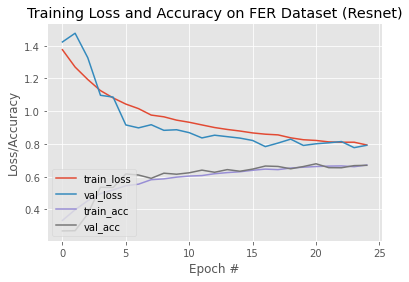

In [13]:
N=25
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history1.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history1.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history1.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history1.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on FER Dataset (Resnet)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [14]:

model.save('resnet50.h5')

model.save_weights('resnet50_weights.h5')


In [15]:

test = '../input/fer-dsc-v3/final_data_v5/final_data_v5/Test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory (test, batch_size=256, class_mode='categorical', target_size=(48,48))

model.evaluate(test_generator, steps=4)

Found 1649 images belonging to 4 classes.
4/4 [==============================] - 0s 116ms/step - loss: 0.7867 - accuracy: 0.6738


[0.7866814732551575, 0.673828125]